# Baseball Case Study

# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors


Output: Number of predicted wins (W)

# Attribute Information

W -- WIN  (Target Variable)

R -- Runs

AB -- At Bats

H -- Hits

2B -- Doubles

3B -- Triples

HR -- Homeruns

BB -- Walks

SO -- Strikeouts

SB -- Stolen Bases

RA -- Runs Allowed

ER -- Earned Runs

ERA -- Earned Run Average

SHO -- Shutouts

SV -- Saves

E -- Errors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Loading the Dataset
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
##checking the shape
df.shape

(30, 17)

#### Observation
1-our dataset have 30 rows and 17 attributes including target attribute W(Wins)

2-This Is regression Problem Statement because target is in numerical/integer format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


1: This shows that there is no null values present in our dataset.

2: All the data type of the attributes are ok.

3: All the attributes are 'Int64' data type except ERA which is of 'float64' data type.

In [5]:
## Checcking Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:title={'center':'Null Values Heatmap'}>

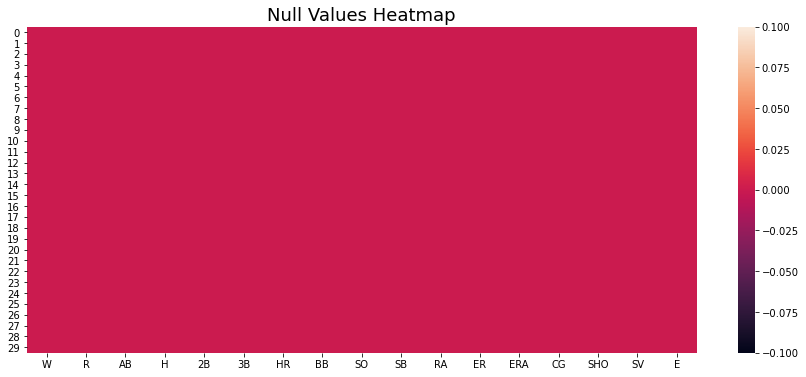

In [6]:
plt.figure(figsize=(15,6))
plt.title('Null Values Heatmap',fontsize=18)
sns.heatmap(df.isnull())

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Observation

1- We can observe from the above table that for most of attributes Mean and Median (50%) is approximatly same.

2- We can infer from this that Most of attributes data are normally distributed.

3-In some attributes such as 'H','HR', Mean value is greater than Median value which means data is right skewed in Nature.

4- It seems from above table that possiblity of outliers are very less in our dataset.

<AxesSubplot:title={'center':'Correlation Heat Map'}>

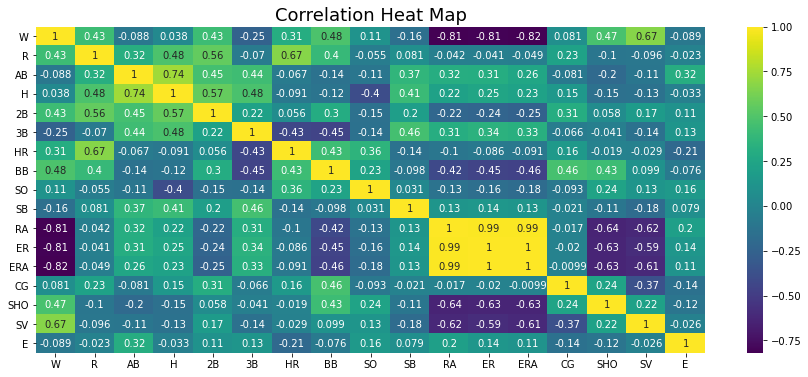

In [8]:
### Correlation Matrix
plt.figure(figsize=(15,6))
plt.title('Correlation Heat Map',fontsize=18)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### Observation
1- From the above observation we can say that Runs allowed, Earned Runs and Earned runs average are highly negatively correlated with the target Variable

2- It shows that Runs allowed, Earned runs and Earned runs average are highly correlated with each other. They are almost same as they show 99% correlation between each other.

3- Also Runs, Doubles(2B), Walks(BB), Shutouts(SHO) and saves(SV) show positive correlation between the target variable Wins(W).

<AxesSubplot:title={'center':'Correlation with Target'}>

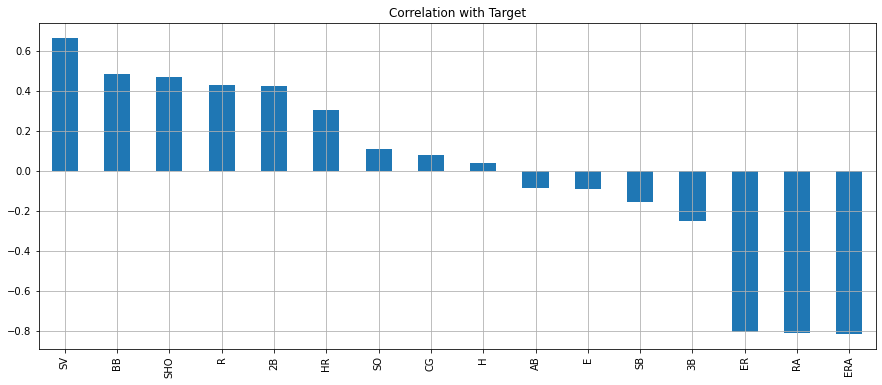

In [9]:
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot.bar(figsize = (15,6), grid=True, title = 'Correlation with Target')

#### Observation

1- Saves(SV), Walks(BB), Shutouts(SHO), Runs(R) and Doubles(2B) are important features which are positivly correlated to our Target Attribute Wins(W).

2- Feature like H(Hits),AB(at bats) has correlation value near to zero which means almost no significance for target attribute prediction.

## Data Visualization

<AxesSubplot:title={'center':'Saves Vs Number of Wins  '}, xlabel='SV', ylabel='W'>

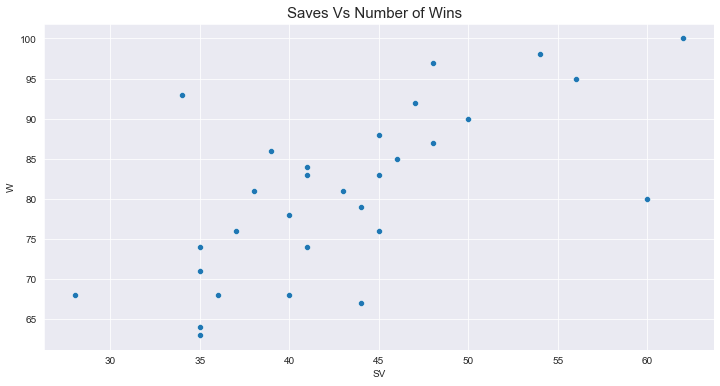

In [10]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Saves Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['SV'],df['W'],data=df)

#### Observation:

1- We have very less data points.

2- From above scatter plot it shows as Number of saves increase the Game winning Chances(numbers) also get increase.

3- We get Moderate Linear relation here.

<AxesSubplot:title={'center':'Saves'}, xlabel='SV'>

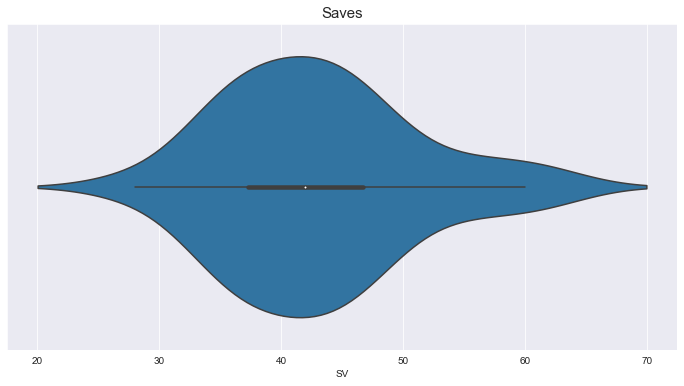

In [11]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Saves',fontsize=15)
sns.violinplot(df['SV'],data=df)

#### Observation:

1- Here we can see that there is high number of saves between 30 and 50. That means the number of saves is very high between 30 and 50.

<AxesSubplot:title={'center':'Walks Vs Number of Wins  '}, xlabel='BB', ylabel='W'>

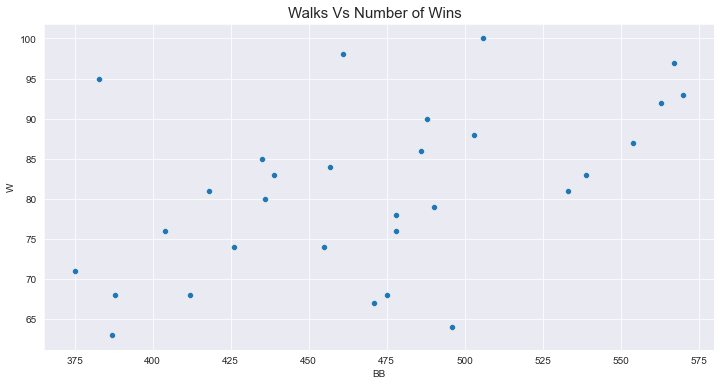

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Walks Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['BB'],df['W'],data=df,y_jitter=True)

#### Observation:

1- We can see that we get a mix kind of response from here

2- As the number of Walks increases the number of wins also increases.

3- There are some points where we can see higher winning number despite lower walks we may consider that as annomly in data and we will correct it.

<AxesSubplot:title={'center':'Walks'}, xlabel='BB'>

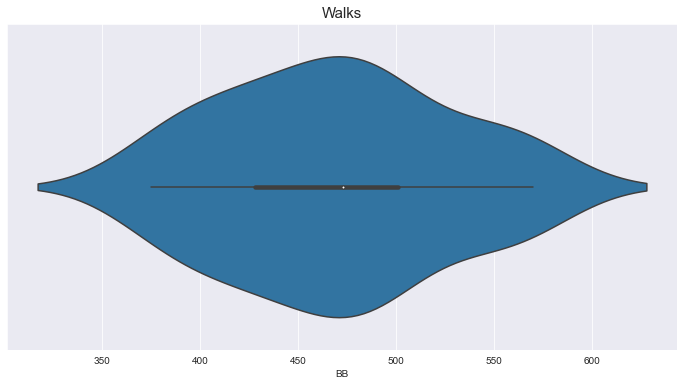

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Walks',fontsize=15)
sns.violinplot(df['BB'],data=df,y_jitter=True)

#### Observation:

1 -From the above observation we can say that there is high concentration of the Walks between 450 and 500.

<AxesSubplot:title={'center':'Shutouts Vs Number of Wins  '}, xlabel='SHO', ylabel='W'>

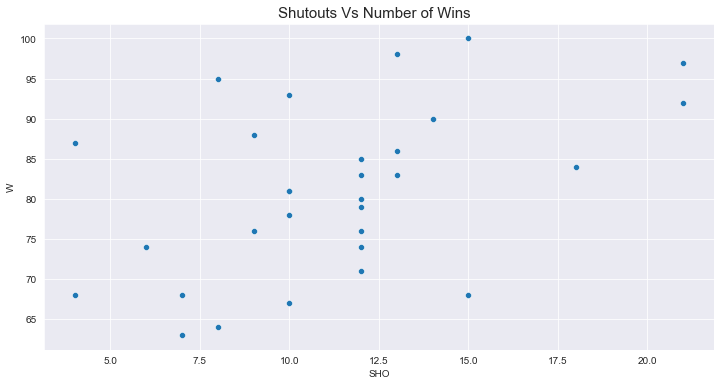

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Shutouts Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['SHO'],df['W'],data=df,y_jitter=True)

Here we get a mix trend of our data points. In some points where shutouts are same are getting different winnings numbers.

<AxesSubplot:title={'center':'Shutouts'}, xlabel='SHO'>

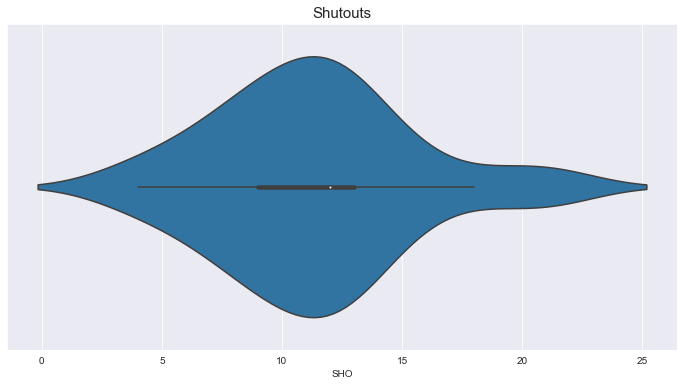

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Shutouts',fontsize=15)
sns.violinplot(df['SHO'],data=df,y_jitter=True)

Here we can see that there is high concentration of shutouts between 7.5 and 12.5.

<AxesSubplot:title={'center':'Earned Runs Vs Number of Wins  '}, xlabel='ER', ylabel='W'>

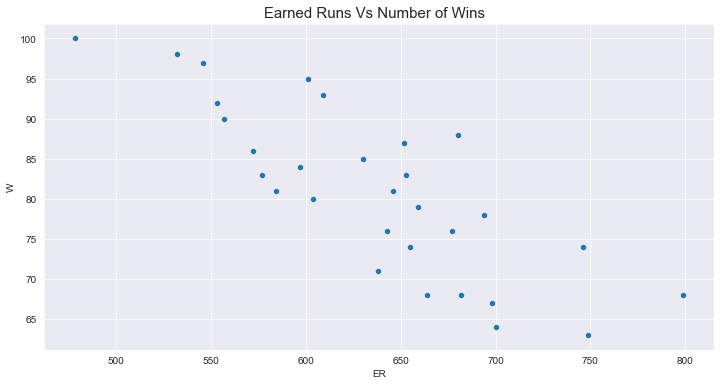

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Earned Runs Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['ER'],df['W'],data=df,y_jitter=True)

#### Observation:
    
1- We get a trend of datapoints which shows a negative slope.

2- A Earned Runs increases the number of winnings games decreases.

3- Inverse relationship between ER and Winning Numbers.

<AxesSubplot:title={'center':'Earned Runs'}, xlabel='ER'>

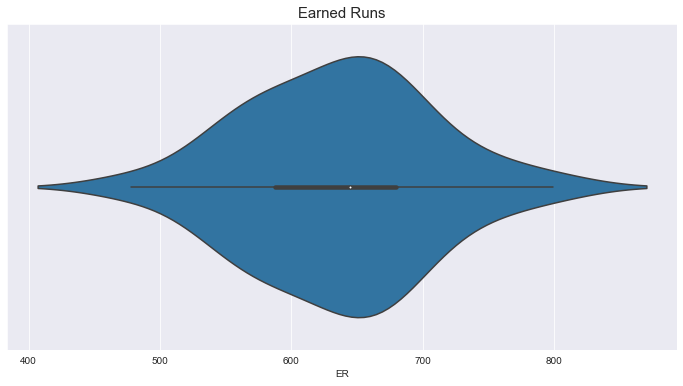

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Earned Runs',fontsize=15)
sns.violinplot(df['ER'],data=df,y_jitter=True)

This violin plot shows there is high Earned Runs value between 600 and 700, there have been high runs earned between 600 and 700.

<AxesSubplot:title={'center':' Runs allowed Vs Number of Wins'}, xlabel='RA', ylabel='W'>

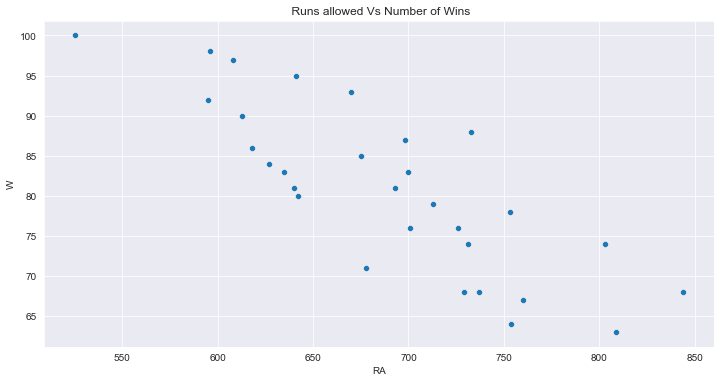

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Runs allowed Vs Number of Wins')
sns.scatterplot(df['RA'],df['W'],data=df,y_jitter=True)

#### Observations:

1- We are getting negative slope

2- As Runs allowed increases we can see that the number of wininigs decreases.

<AxesSubplot:title={'center':' Runs allowed'}, xlabel='RA'>

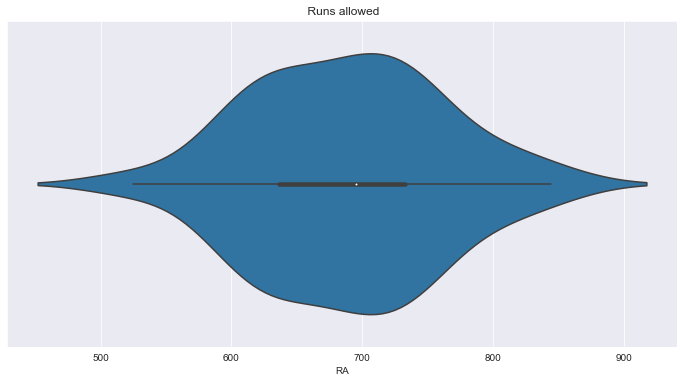

In [19]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Runs allowed')
sns.violinplot(df['RA'],data=df,y_jitter=True)

Here we can see that there are high number of runs allowed between 600 and 750.

<AxesSubplot:title={'center':' E Vs Number of Wins  '}, xlabel='E', ylabel='W'>

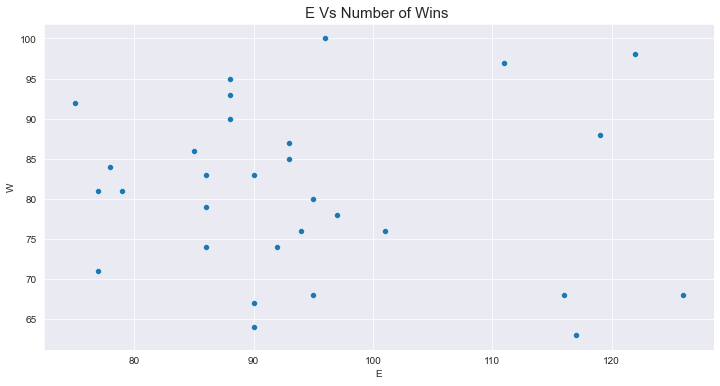

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' E Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['E'],df['W'],data=df,y_jitter=True)

We can't get very useful insight from this data points. A complete moderate datapoints we are getting on scatter plot.

<AxesSubplot:title={'center':' Errors'}, xlabel='E'>

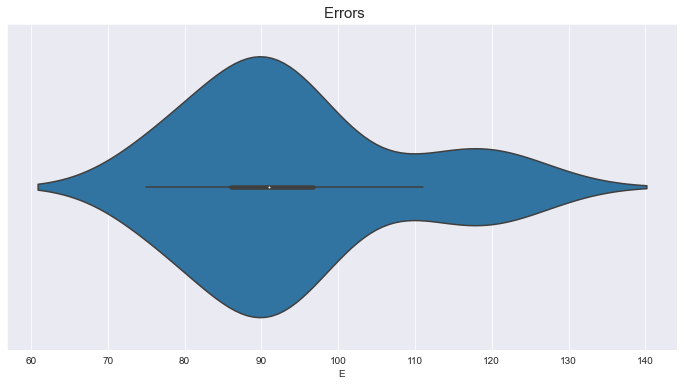

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Errors',fontsize=15)
sns.violinplot(df['E'],data=df,y_jitter=True)

As we can see that there are high concentration of errors between 80 and 100.

<AxesSubplot:title={'center':' Doubles Vs Number of Wins  '}, xlabel='2B', ylabel='W'>

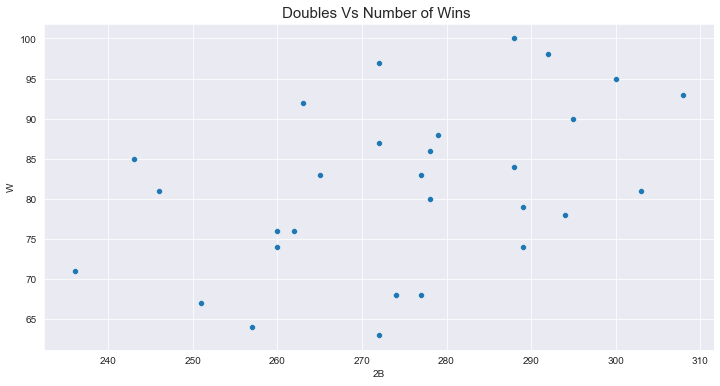

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Doubles Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['2B'],df['W'],data=df,y_jitter=True)

There is some positive linear relation we can see here in this plot.

If any team take more double in the match/Tournament , the number of winning games inreases.

<AxesSubplot:title={'center':' Doubles'}, xlabel='2B'>

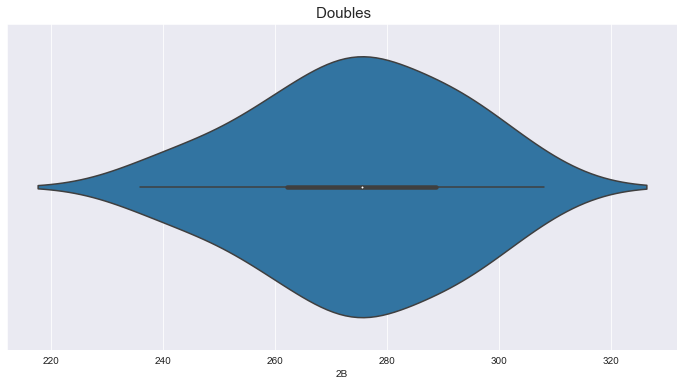

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Doubles',fontsize=15)
sns.violinplot(df['2B'],data=df,y_jitter=True)

Here we can see that there are high doubles taken between 260 and 300.

<AxesSubplot:title={'center':' Triples Vs Number of Wins  '}, xlabel='3B', ylabel='W'>

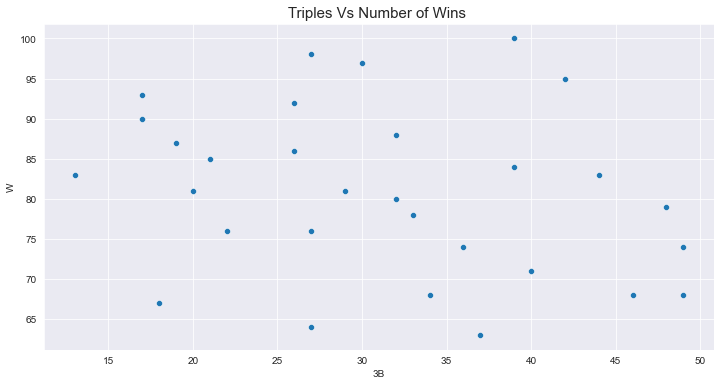

In [24]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Triples Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['3B'],df['W'],data=df,y_jitter=True)

#### Observation:

1- There is no such a relation with number of wins and Triples.

2- Data points are scatter all across the x & Y irrespective of X and Y values.

3- No trend/conclusion  we can get .

<AxesSubplot:title={'center':'Triples'}, xlabel='3B'>

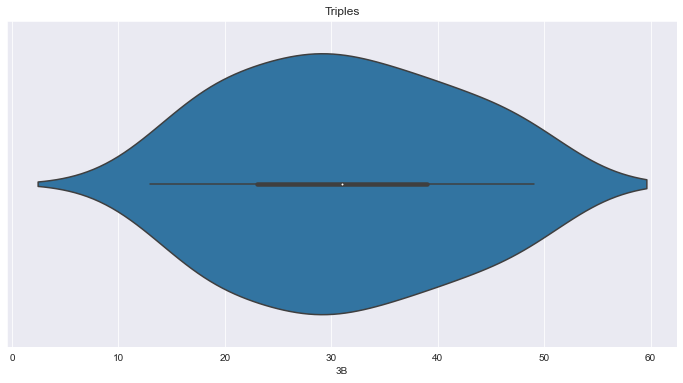

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Triples')
sns.violinplot(df['3B'],data=df,y_jitter=True)

Here we can see that there are high number of Triples taken between 20 and 40.


## Distribution

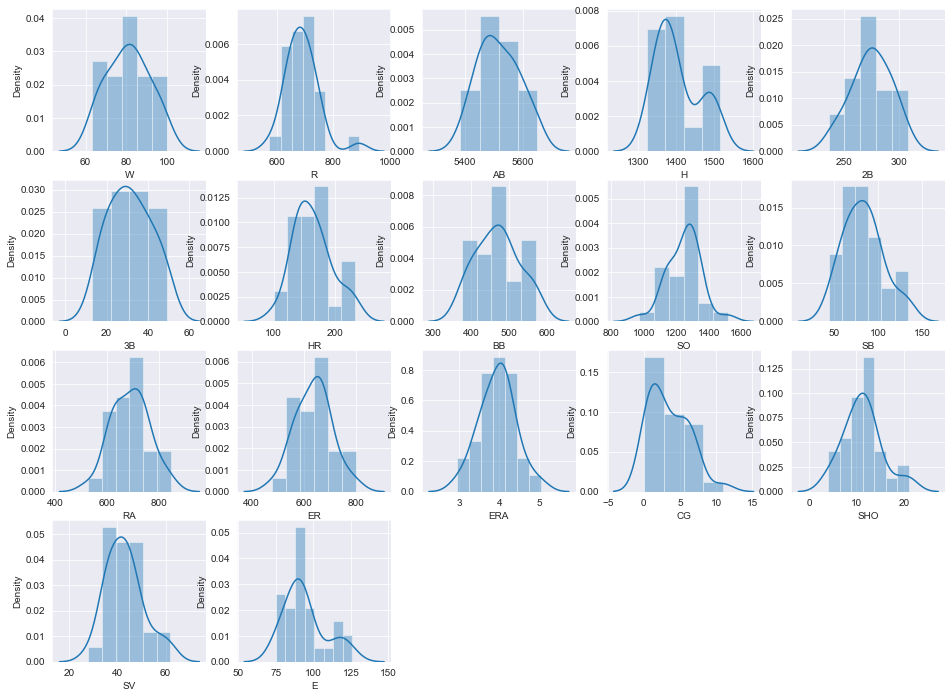

In [26]:
plt.figure(figsize=(16,12))
plot=1
for col in df:
    if plot<=17:
        plt.subplot(4,5,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1

All of our data are Normally distributed. Later we will check the skewness of the columns and correct them after the removal of outliers.

# Outliers Detection

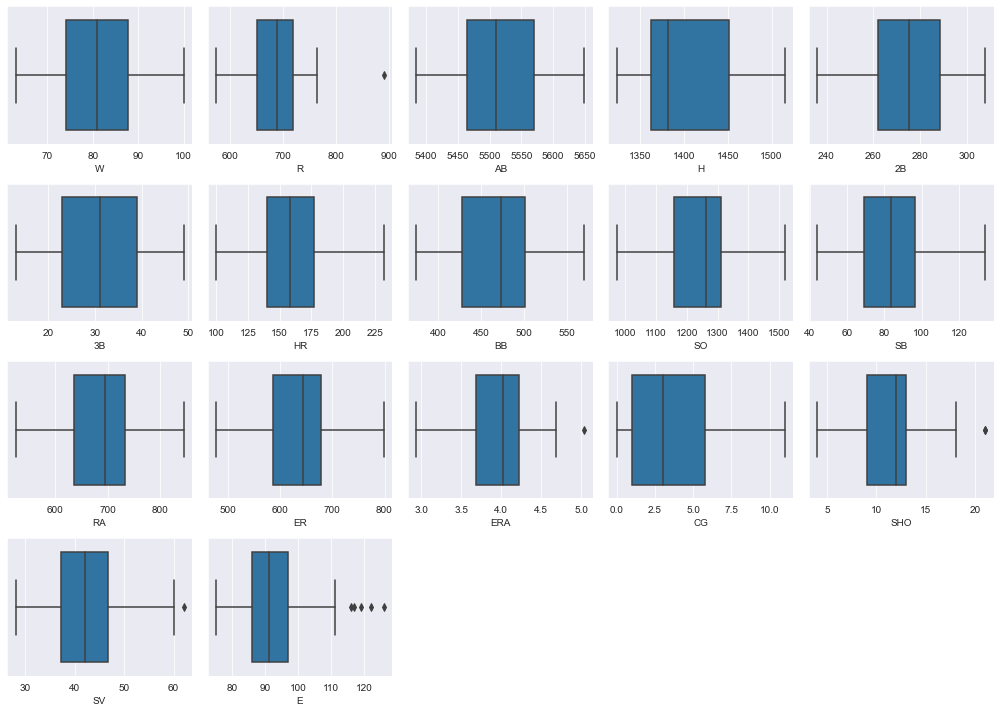

In [27]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=17:
        plt.subplot(4,5,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
    plt.tight_layout()

From the above observation we can say that there are some outliers in R(Runs), ERA(Earned runs average), SHO(Shutouts), SV(Saves), and E(Errors)columns. We will treat them with zscore method.

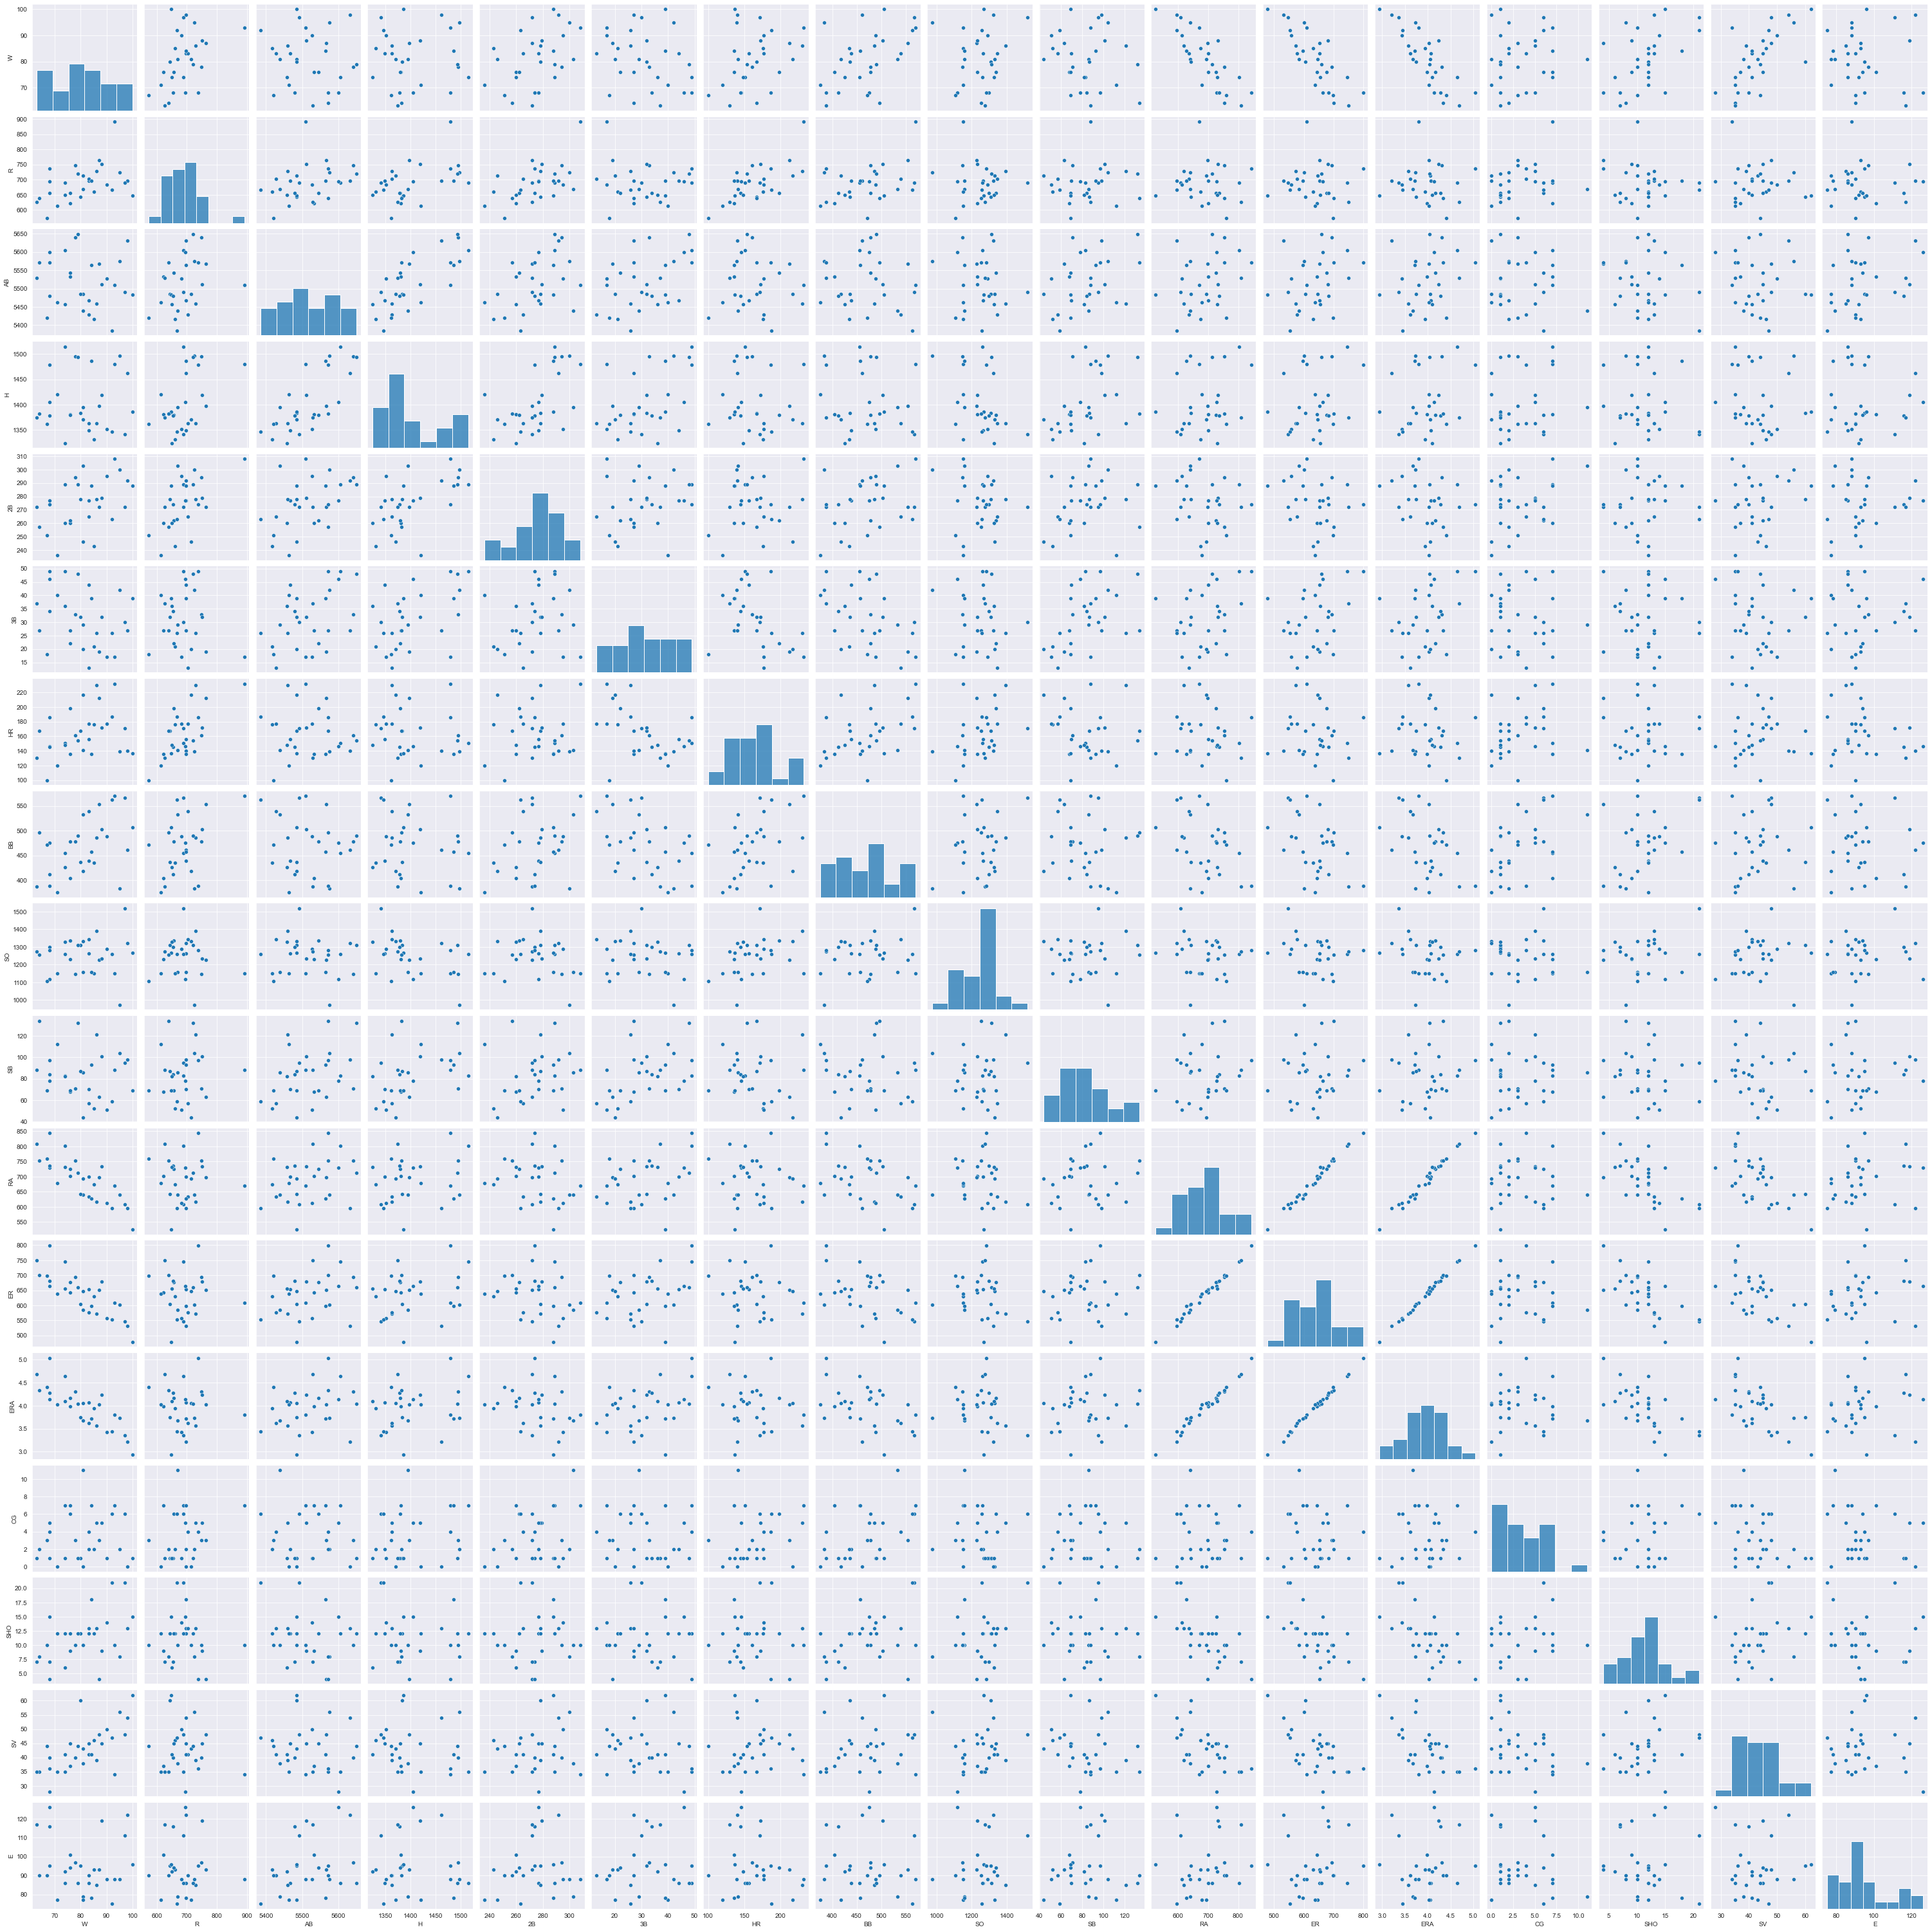

In [28]:
sns.pairplot(df)

In [29]:
from scipy.stats import zscore
z =np.abs(zscore(df))
print(z.shape)
df_new = df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(30, 17)
(29, 17)


We have droped the outliers from data. Only 1 row dropped.

# Skewness

In [30]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [31]:
df_new1 = df_new.copy()

In [32]:
for i in df_new1:
    if df_new1[i].skew()>=0.5:
        df_new1[i] = np.log1p(df_new1[i])
    elif df_new1[i].skew()<= -0.5:
        df_new1[i] = np.log1p(df_new1[i])

In [33]:
df_new1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

After applying the log1p transformation the skewness is not removed. Hence we will try some another method.

In [34]:
df_new2 = df_new.copy()

In [35]:
for i in df_new2:
    if df_new2[i].skew()>=0.5:
        df_new2[i] = np.sqrt(df_new2[i])
    elif df_new2[i].skew()<= -0.5:
        df_new2[i] = np.sqrt(df_new2[i])

In [36]:
df_new2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.714966
dtype: float64

Here after applying square root transformation there is still skewness present in Hits(H) and Error(E) column, hence we will try some other method.

In [37]:
df_new3 = df_new.copy()

In [38]:
for i in df_new3:
    if df_new3[i].skew()>=0.5:
        df_new3[i] = np.cbrt(df_new3[i])
    elif df_new3[i].skew()<= -0.5:
        df_new3[i] = np.cbrt(df_new3[i])

In [39]:
df_new3.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO   -0.298136
SV     0.280963
E      0.671748
dtype: float64

Here after applying cube root transformation there is still skewness present in Hits(H) and Error(E)  and CG column, hence we will try some other method.

In [40]:
df_new4 = df_new.copy()

In [41]:
for i in df_new4:
    if df_new4[i].skew()>=0.5:
        df_new4[i] = np.log(df_new4[i])
    elif df_new4[i].skew()<= -0.5:
        df_new4[i] = np.log(df_new4[i])

In [42]:
df_new4.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG          NaN
SHO   -0.726124
SV     0.096752
E      0.583308
dtype: float64

Here we are getting NaN values in CG column which is not good. Thus we will not apply log transformation in this data columns.

In [43]:
df_new5 = df_new.copy()

In [44]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in df_new5:
    if df_new5[i].skew()>=0.5:
        df_new5[i] = pt.fit_transform(df_new5[i].values.reshape(-1,1))
    elif df_new5[i].skew()<= -0.5:
        df_new5[i] = pt.fit_transform(df_new5[i].values.reshape(-1,1))

In [45]:
df_new5.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [46]:
df_new5.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,0.0,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,83,696,5467,0.0,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,81,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,76,622,5533,0.0,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,74,689,5605,0.0,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820


In [47]:
df_new5['H'].value_counts()

0.0    29
Name: H, dtype: int64

Here after applying Power Transformer all the values in the H(Hits) column become zero, hence we can't use this method in this column. We will now apply box cox transformation in the H(Hits) column to remove the skewness.

In [48]:
df_new6 = df_new.copy()

In [49]:
from scipy.stats import boxcox
df_new6['H'] = boxcox(df_new6['H'], 1)

In [50]:
df_new6.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

By applying the boxcox method also the skewness in the H(Hits) column didn't get removed. Hence we will now try the quantile method.

In [51]:
df_new7 = df_new.copy()

<AxesSubplot:xlabel='H', ylabel='Density'>

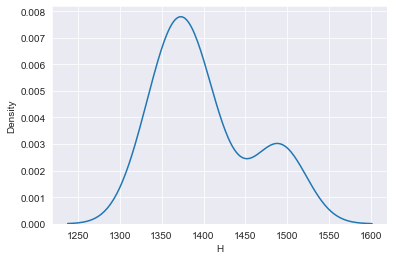

In [52]:
sns.kdeplot(df_new7['H'])

In [53]:
quant = df_new7['H'].quantile(.97)
df_new7 = df_new7[df_new7['H']< quant]
df_new7.skew()


W      0.057481
R     -0.193186
AB     0.248738
H      0.835008
2B    -0.270681
3B     0.096274
HR     0.409063
BB     0.127447
SO    -0.222169
SB     0.485658
RA     0.041532
ER     0.046578
ERA    0.056356
CG     0.989713
SHO    0.537125
SV     0.584867
E      0.783929
dtype: float64

It further increases the skewness of the column H(Hits) hence this method is also not valid. Henc ewe will apply Power transformation in all the columns except the H(Hits) column and apply log transformation on the H(Hits) column which makes it close to 0.5 a smuch as possible. 

In [54]:
df_new8 = df_new.copy()

In [55]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_new8['CG'] = pt.fit_transform(df_new8['CG'].values.reshape(-1,1))
df_new8['SHO'] = pt.fit_transform(df_new8['SHO'].values.reshape(-1,1))
df_new8['SV'] = pt.fit_transform(df_new8['SV'].values.reshape(-1,1))
df_new8['E'] = pt.fit_transform(df_new8['E'].values.reshape(-1,1))
df_new8['H'] = np.log(df_new8['H'])

In [56]:
df_new8.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Hence we can see that all the skewness of the columns has been removed except the H(Hits) column for which we have applied all types of transformation method but not able to remove the skewness. The maximum skewness can be removed by the log tranformation method which is till 0.73. This happens also because the data which we have is very low, due to very less data (only 29 rows) our skewness remains.

# Splitting data into Input and Output Variable

In [57]:
X = df_new8.drop('W', axis = 1)
y = df_new8['W']

In [58]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311218,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,7.207119,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,7.240650,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,7.230563,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,7.323171,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820
6,764,5567,7.242082,272,19,212,554,1227,63,698,652,4.03,0.121871,-2.064039,0.677176,0.082858
7,713,5485,7.222566,246,20,217,418,1331,44,693,646,4.05,-1.732896,-0.252844,0.052325,-1.588197
8,644,5485,7.232010,278,32,167,436,1310,87,642,604,3.74,-0.870682,0.236737,1.908137,0.237592
9,748,5640,7.309881,294,33,161,478,1148,71,753,694,4.31,0.121871,-0.252844,-0.365006,0.383386
10,751,5511,7.257708,279,32,172,503,1233,101,733,680,4.24,0.770649,-0.513555,0.312020,1.554265


In [59]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Scaling
As our data is not completely normally distributed as some skewness is still there we will apply the MinMax scaler to scale our X columns.

In [60]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled=mms.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.790576,0.719697,0.911305,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.380801,0.307357,0.879539,0.413483
1,0.643979,0.310606,0.138813,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.380801,0.553751,0.613222,0.361169
2,0.502618,0.204545,0.387635,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.435918,0.400262,0.147814
3,0.256545,0.560606,0.312786,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.800532,0.373171,0.366108,0.684918
4,0.607330,0.833333,1.000000,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.800532,0.553751,0.294447,0.361169
5,1.000000,0.689394,0.398267,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.495369,0.000000,0.692885,0.530613
6,0.732984,0.378788,0.253442,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.435918,0.556566,0.076613
7,0.371728,0.378788,0.323525,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.230279,0.553751,0.961433,0.572651
8,0.916230,0.965909,0.901384,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.495369,0.435918,0.465521,0.612261
9,0.931937,0.477273,0.514218,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.668644,0.373171,0.613222,0.930371


# Feature Importance

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(X,y)

ExtraTreesRegressor()

In [62]:
print(et.feature_importances_)

[0.05516011 0.01375542 0.01841052 0.01533979 0.00844031 0.02503222
 0.0260867  0.02189516 0.01360609 0.18518153 0.15745302 0.23586262
 0.01184037 0.01687138 0.17541374 0.01965104]


<AxesSubplot:title={'center':'Important Features'}>

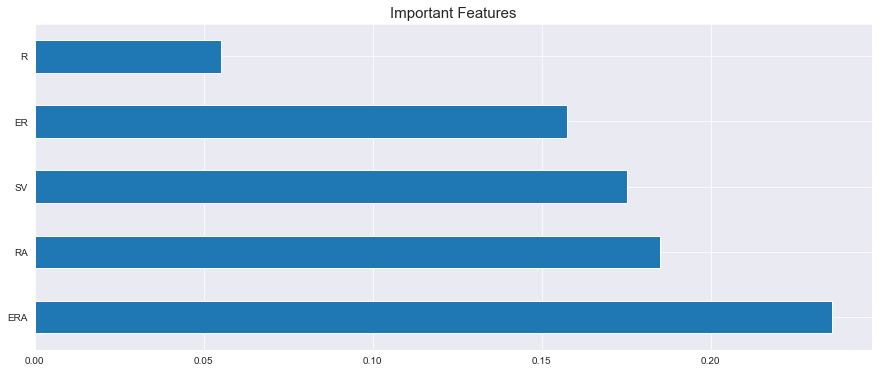

In [63]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(et.feature_importances_,index=X.columns)
feat_importance.nlargest().plot(kind='barh')

We can see that SV(Saves),RA(Runs Allowed),ERA(Earned Run Average) are the most important Features for prediction of Number of win counts for our Machine Learning Model

# Model Building

In [64]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [76]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2', cv=5).mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2', cv=5).std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

In [77]:
#Linear Regression
LR = LinearRegression()
maxr2_score(LR, X, y)

max r2 score corresponding to 3 is 0.8676486641464379


cross validation score 0.05092079750241134


Standard Deviation 0.4502962782380506


Training accuracy 0.9631455446308053


Test Accuracy 0.8497758105528213


MAE 4.469840027383079


MSE 22.917534678997384


RMSE 4.787226198854341


3

In [78]:
#Lasso
lasso = Lasso()
maxr2_score(lasso, X, y)

max r2 score corresponding to 46 is 0.7077215663402621


cross validation score -0.03516845950807919


Standard Deviation 0.6053043504776767


Training accuracy 0.49665792002941467


Test Accuracy 0.31475495481196525


MAE 9.212168254867665


MSE 104.5379385603524


RMSE 10.224379617382779


46

In [79]:
#Ridge
ridge = Ridge()
maxr2_score(ridge, X,y)

max r2 score corresponding to 46 is 0.9187881035575238


cross validation score 0.33331041718486026


Standard Deviation 0.6552947570855682


Training accuracy 0.8350917926951701


Test Accuracy 0.8079810496228967


MAE 4.837503500337884


MSE 29.29355765197363


RMSE 5.412352321493274


46

In [80]:
#Elasticnet
elasticnet = ElasticNet()
maxr2_score(elasticnet, X,y)

max r2 score corresponding to 46 is 0.41415755105984775


cross validation score -0.1377867420446118


Standard Deviation 0.38562662579372425


Training accuracy 0.24558502980941566


Test Accuracy 0.20670616729823377


MAE 9.690973779561359


MSE 121.02138136661388


RMSE 11.000971837370273


46

In [81]:
#Decision Tree Regressor
DT = DecisionTreeRegressor()
maxr2_score(DT, X, y)

max r2 score corresponding to 8 is 0.820240376241073


cross validation score -2.1773496612674426


Standard Deviation 4.631467614741753


Training accuracy 1.0


Test Accuracy 0.34996358339402767


MAE 8.5


MSE 99.16666666666667


RMSE 9.958246164193104


8

In [82]:
## KNN
KNN = KNeighborsRegressor()
maxr2_score(KNN,X,y)

max r2 score corresponding to 61 is 0.7178818112049117


cross validation score -0.09240623332589395


Standard Deviation 1.1004106831903042


Training accuracy 0.6030722042609633


Test Accuracy 0.6656955571740711


MAE 6.800000000000002


MSE 51.00000000000003


RMSE 7.141428428542852


61

In [83]:
##SVM
SVM =SVR()
maxr2_score(SVM,X,y)

max r2 score corresponding to 14 is 0.1989476726169126


cross validation score -0.3143353186235181


Standard Deviation 0.5107483655274145


Training accuracy 0.20625824133628745


Test Accuracy 0.15337477918704434


MAE 9.999232136043055


MSE 129.15738090846534


RMSE 11.364742887917233


14

In [84]:
## random Forest
RF =RandomForestRegressor()
maxr2_score(RF,X,y)

max r2 score corresponding to 4 is 0.8038955102040819


cross validation score -0.6577288055392


Standard Deviation 2.0171044301246273


Training accuracy 0.9260343985741524


Test Accuracy 0.6932910779315368


MAE 5.864999999999999


MSE 46.790150000000004


RMSE 6.8403325942530016


4

In [85]:
## AdaBoost
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,X,y)

max r2 score corresponding to 47 is 0.7505770532509146


cross validation score -0.43082255651000495


Standard Deviation 0.5161865539972474


Training accuracy 0.5089526618514154


Test Accuracy 0.3430627728925484


MAE 8.80872990100623


MSE 100.21942364650344


RMSE 10.010965170576883


47

In [86]:
## Gradient Boost
Gnb=GradientBoostingRegressor()
maxr2_score(Gnb,X,y)

max r2 score corresponding to 11 is 0.9215267176272868


cross validation score -1.2632898178429113


Standard Deviation 3.6855694534186596


Training accuracy 0.9999998270821823


Test Accuracy 0.7524273572762669


MAE 5.218785216146922


MSE 37.76858205107617


RMSE 6.145614863549144


11

From all above models we can see that Ridge Regressor has a very good training and Testing Accuracy. 

We will choose ridge regressor as our best model because the difference between the Test accuracy & Training accuracy score is very less as compare to other models. And also the difference between the r2_score and crossvalidation score is less in it.

# Hyperparameter Tuning of Ridge Regressor

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
glf=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=-1)
glf.fit(X_train,y_train)
glf.best_params_


{'alpha': 1, 'solver': 'lsqr'}

In [88]:
ridge1=Ridge(alpha=1,solver='lsqr')
ridge1.fit(X_train,y_train)
pred=ridge1.predict(X_test)
print('Training accuracy',ridge1.score(X_train,y_train))
print('\n')
print('Test Accuracy',ridge1.score(X_test,y_test))
print('\n')

print('Error:')
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 score',r2_score(pred,y_test))

Training accuracy 0.8593108454834557


Test Accuracy 0.9185645329791199


Error:
MAE 1.8611981229824248


MSE 4.951728814130738


RMSE 2.225248034294321


R2 score 0.9014572376822969


Here we can see that our training and test accuracy improved and also the r2_score improved. Our Errors also get decreased hence we will chose this as our final model.

# Saving the Model

In [89]:
import joblib
joblib.dump(ridge1, 'Baseballridge1.pkl')

['Baseballridge1.pkl']

# Loading the Model

In [90]:
model = joblib.load('Baseballridge1.pkl')

In [91]:
prediction= model.predict(X_test)
prediction

array([79.76005294, 86.44648578, 67.947155  , 74.07014927, 78.45550224,
       88.95744209])